In [1]:
import os
import cv2
from matplotlib import pyplot as plt
from enum import Enum
import pandas as pd

In [2]:
from data_preprocessing import DataPreprocessing
from feature_extraction import FeatureExtraction
from hand_recognition_main import DataLoader

In [3]:
#methods for debugging - easier to watch images in jupyter notebook
#cv_imshow uses opencv gtk gui - to close image hit any key - otherwise jupyter will freeze!
def cv_imshow(windowname, image):
    cv2.namedWindow(windowname,cv2.WINDOW_NORMAL) 
    cv2.imshow(windowname,image)
    cv2.waitKey(0)
    cv2.destroyAllWindows() 
#plt_imshow uses pyplot from matplotlib
def plt_imshow(windowname, image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(windowname)
    plt.show()

In [4]:
dLoader_obj = DataLoader(os.path.join("Processed","ResizedImages"))


Found: 579 images in folder.


In [5]:
listOfImagesDirectories = dLoader_obj.imagesList_dir

In [6]:
listOfImagesDirectories[0:10]

['O_4_A.jpg',
 'Y_3_O.jpg',
 'V_5_A.jpg',
 'K_7_O.jpg',
 'U_5_A.jpg',
 'A_1_O.jpg',
 'G_5_O.jpg',
 'T_7_O.jpg',
 'V_1_O2.jpg',
 'G_2_T.jpg']

In [7]:
imageData = [elem.replace('.jpg','').split("_") for elem in listOfImagesDirectories]
signsList = [elem[0] for elem in imageData]
idsList = [elem[1] for elem in imageData]
authorsList = [elem[2] for elem in imageData]

In [8]:
df = pd.DataFrame(list(zip(signsList, idsList, authorsList)), 
               columns =['Sign', 'InClassId','Author']) 

In [9]:
df.head(10)

,Sign,InClassId,Author
0,O,4,A
1,Y,3,O
2,V,5,A
3,K,7,O
4,U,5,A
5,A,1,O
6,G,5,O
7,T,7,O
8,V,1,O2
9,G,2,T


In [10]:
Ids = df[(df['Sign'] == 'D') & (df['Author'] == 'A')].index[0], df[(df['Sign'] == 'D') & (df['Author'] == 'T')].index[0], df[(df['Sign'] == 'D') & (df['Author'] == 'O')].index[0]
Ids1 = df[(df['Sign'] == 'D') & (df['Author'] == 'A')].index[5], df[(df['Sign'] == 'D') & (df['Author'] == 'T')].index[5], df[(df['Sign'] == 'D') & (df['Author'] == 'O')].index[5]

In [11]:
Ids

(69, 10, 44)

In [12]:
Ids1 

(540, 243, 437)

In [13]:
dA,dT,dO = dLoader_obj.loadImageCv(Ids[0]),dLoader_obj.loadImageCv(Ids[1]),dLoader_obj.loadImageCv(Ids[2])

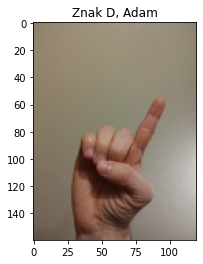

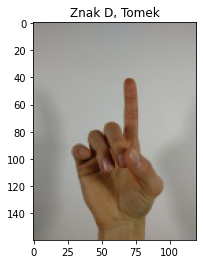

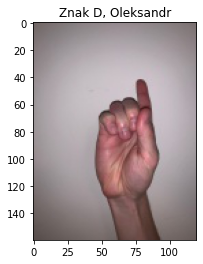

(None, None, None)

In [14]:
plt_imshow("Znak D, Adam",dA),plt_imshow("Znak D, Tomek",dT),plt_imshow("Znak D, Oleksandr",dO)

In [15]:
COLORSPACE = Enum('Colorspace', 'HSV YUV YCBCR') 
dPrep_obj = DataPreprocessing()

In [16]:
# img_cvt, tresh_img = dPrep_obj.skinDetection(COLORSPACE.HSV,dA)
# plt_imshow("",tresh_img)
# img_cvt, tresh_img = dPrep_obj.skinDetection(COLORSPACE.HSV,dT)
# plt_imshow("",tresh_img)
# img_cvt, tresh_img = dPrep_obj.skinDetection(COLORSPACE.HSV,dO)
# plt_imshow("",tresh_img)

In [17]:
# img_cvt, tresh_img = dPrep_obj.skinDetection(COLORSPACE.YUV,dA)
# plt_imshow("",tresh_img)
# img_cvt, tresh_img = dPrep_obj.skinDetection(COLORSPACE.YUV,dT)
# plt_imshow("",tresh_img)
# img_cvt, tresh_img = dPrep_obj.skinDetection(COLORSPACE.YUV,dO)
# plt_imshow("",tresh_img)

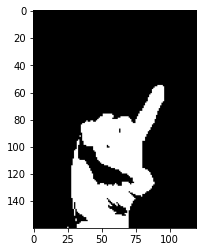

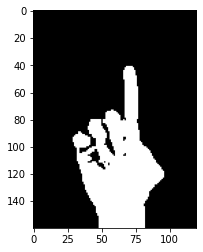

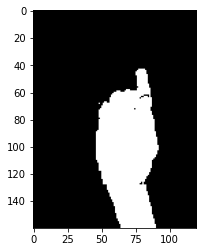

In [18]:
img_cvt, tresh_img = dPrep_obj.skinDetection(COLORSPACE.YCBCR,dA)
plt_imshow("",tresh_img)
img_cvt, tresh_img = dPrep_obj.skinDetection(COLORSPACE.YCBCR,dT)
plt_imshow("",tresh_img)
img_cvt, tresh_img = dPrep_obj.skinDetection(COLORSPACE.YCBCR,dO)
plt_imshow("",tresh_img)

In [19]:
# cv_imshow("YCBCR_tresh",tresh_img),cv_imshow("YCBCR_tresh",img_cvt)

In [20]:
# _, tresh_img_hsv = dPrep_obj.skinDetection(COLORSPACE.HSV,dO)
# _,tresh_img_ycbcr = dPrep_obj.skinDetection(COLORSPACE.YCBCR,dO)

In [21]:
# skinSum = cv2.bitwise_or(tresh_img_hsv,tresh_img_ycbcr)
# plt_imshow("",skinSum)


In [22]:
cv2.destroyAllWindows()

In [23]:
dA,dT,dO = dLoader_obj.loadImageCv(Ids1[0]),dLoader_obj.loadImageCv(Ids1[1]),dLoader_obj.loadImageCv(Ids1[2])

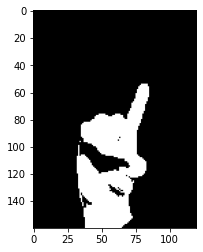

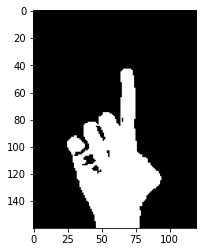

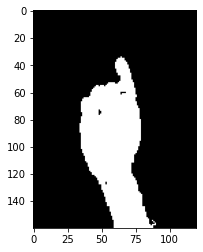

In [24]:
img_cvt, tresh_img = dPrep_obj.skinDetection(COLORSPACE.YCBCR,dA)
plt_imshow("",tresh_img)
img_cvt, tresh_img = dPrep_obj.skinDetection(COLORSPACE.YCBCR,dT)
plt_imshow("",tresh_img)
img_cvt, tresh_img = dPrep_obj.skinDetection(COLORSPACE.YCBCR,dO)
plt_imshow("",tresh_img)